# Venues Data Analysis of Moscow City 

# Capstone Project - The Battle of the Neighborhoods

## Applied Data Science Capstone by IBM/Coursera

# Introduction <a name="Introduction"></a>

## Background <a name="Background"></a>

Moscow, one of the largest metropolises in the world with a population of more than 12 million people, covers an area of ​​more than 2561.5 km² with an average density of inheritance of 4924.96 people / km² [1](https://ru.wikipedia.org/wiki/%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D0%B0).

Moscow is divided into 12 districts (125 boroughs, 2 urban boroughs, 19 settlement boroughs).

Moscow has a very uneven population density from 30429 people / km² for the "Зябликово" borough, to 560 people / km² for the "Молжаниновский" borough [2](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D0%B9%D0%BE%D0%BD%D1%8B_%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D1%8B).

The average cost of real estate varies from 68,768 rubles / m² for the "Кленовское" borough to 438,568 rubles / m² for the "Арбат" borough [3](https://www.mirkvartir.ru/journal/analytics/2018/02/25/reiting-raionov-moskvi-po-stoimosti-kvartir).

## Business Problem <a name="Business Problem"></a>

Owners of cafes, fitness centers and other social facilities are expected to prefer boroughs with a high population density. Investors will prefer areas with low housing costs and low competitiveness.

On the part of residents, the preference is expected for a boroughs with a low cost of housing and good accessibility of social places.

In my research, I will try to determine the optimal places for the location of fitness centers in Moscow boroughs, taking into account the number of people, the cost of real estate and the density of other fitness facilities.

The key criteria for selecting suitable locations for fitness centers will be:
- High density of the borough population
- Low cost of real estate in the area
- The absence in the immediate vicinity of other fitness facilities of a similar profile

I will use the approaches and methods of machine learning to determine the location of fitness centers in accordance with the specified criteria.

The main stakeholders of my research will be investors interested in opening new fitness centers.

# Data acquisition and cleaning <a name="data"></a>

## Data requirements

Based on the problem and the established selection criteria, to conduct the research, I will need the following information:  

1. main dataset with the list of Moscow Borough, containing the following attributes:
    - name of the each Moscow Borough
    - type of the each Moscow Borough
    - name of the each Moscow District in which Borough is belong to
    - area of the each Moscow Borough in square kilometers
    - the population of the each Moscow Borough
    - housing area of the each Moscow Borough in square meters
    - average housing price of the each Moscow Borough
2. geographical coordinates of the each Moscow Borough
3. shape of the each Moscow Borough in GEOJSON format
4. list of venues placed in the each Moscow Borough with their geographical coordinates and categories

## Decribe data sources 

### Moscow Boroughs dataset

Data for Moscow Boroughs dataset were downloaded from multiple HTTP page combined into one pandas dataframe.
- List of Moscow District and they Boroughs were downloaded from the page [Moscow Boroughs](https://gis-lab.info/qa/moscow-atd.html)
- Information about area of the each Moscow Borough in square kilometers, their population and housing area in square meters were downloaded from the page [Moscow Boroughs Population Density](https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%80%D0%B0%D0%B9%D0%BE%D0%BD%D0%BE%D0%B2_%D0%B8_%D0%BF%D0%BE%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B9_%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D1%8B)
- Information about housing price of the each Moscow Borough were downloaded from the page [Moscow Boroughs Housing Price](https://www.mirkvartir.ru/journal/analytics/2018/02/25/reiting-raionov-moskvi-po-stoimosti-kvartir)

A special Python function has been developed for HTML table parse. This function help me:
- to find number of rows and columns in a HTML table
- to get cloumns titles, if posible
- to convert string to float, if posible
- return result in form of the Pandas dataframe

### Moscow Boroughs geographical coordinates

Geographical coordinates of the each Moscow Borough were queried through Nominatim service.   
As the Nominatim service are quite unstable it was quite a challenge to request coordinate in several iterations.

### Moscow Boroughs shape in GEOJSON format

Shape of the each Moscow Borough in GEOJSON format was downloaded from the page [Moscow Boroughs GEOJSON](http://gis-lab.info/data/mos-adm/mo.geojson)

### Moscow Boroughs venues

To determine **venues** the service **Forsquare API** was used.  
The API of **Forsquare** service have the restriction of 100 **venues**, which it can return in one request.  
To obtain list of all **venues** I used the following approach:  
  - present Moscow area in the form of a regular grid of circles of quite small diameter, no more than 100 **venues** in each circle  
  - perform exploration using **Forsquare API** with quite bigger radius than circle of a grid to make sure it overlaps/full coverage to don't miss any venues
  - cleaning list of venues from duplicates.  

This approach and some of the Python code was taken from the work presented here. https://cocl.us/coursera_capstone_notebook

Circle of 28 000 meter in radius cover all Moscow Boroughs.  
In my research grid of circles contains 7899 cells with radius 300 meter.  
Foursquare API have a certain limitation for API call in one day to explore venues.  
In my case it was about 2000 calls per day.  
So in addition I have to divide grid dataset into subset and call Foursquare API for several days. 

## Decribe data cleansing 

### Moscow Boroughs dataset cleansing

As data for Moscow Boroughs dataset were downloaded from multiple HTTP page it was necessary to perform a data cleaning. Such as:  
- remove some unused colums 
- strip text columns from additional information like ' \n\t'
- replace some Borough_Name as of russian letters "е" and "ё" 
- change places of some words in Borough_Name
- clear Borough Name from additional information, such as ', поселение ', ', городской округ '
- replace '\n', ' ↗' and '↘' in some columns
- delete extra spaces in numeric columns
- replace ',' to '.' for float columns
- convert from float to int for integer columns
- convert from string to float for numeric columns

As the result I had a dataset with all 146 Moscow Boroughs. Result dataset contains columns:
- **Borough_Name** - name of the Moscow Borough - is a unique key of the dataset
- **District_Name** - name of the Moscow District in which Borough is belong to
- **Borough_Type** - type of the Moscow Borough
- **OKATO_Borough_Code** - numeric code of the Moscow Borough
- **OKTMO_District_Code** - numeric code of the Moscow District
- **Borough_Area** - area of the Moscow Borough in square kilometers
- **Borough_Population** - population of the Moscow Borough
- **Borough_Population_Density** - population density of the Moscow Borough
- **Borough_Housing_Area** - housing area of the Moscow Borough in square meters
- **Borough_Housing_Area_Per_Person** - housing area per person of the Moscow Borough in square meters
- **Latitude** - geograprical Latitude of the Moscow Borough
- **Longitude** - geograprical Longitude of the Moscow Borough
- **Borough_Housing_Price** - average housing price of the Moscow Borough

I had a problem to found proper statistics about “housing prices” and “housing area” for some Moscow boroughs, so I had to exclude 26 boroughs from my analysis.   
Fortunately, they all had a low population density, which meat criteria of my research and did not reduce it quality.

### Moscow Boroughs geographical coordinates cleansing

Nominatim service not only quite unstable.  
It also have a occasionally problem with russian leter **ё**. So I have to manyaly obtain coordinates for such boroughs as:
 - Дес**ё**новское, Поселение, Новомосковский  
 - Сав**ё**лки, Муниципальный округ, ЗелАО
 - Кл**ё**новское, Поселение, Троицкий  
 - And some others.

Another problem with Nominatim service is that it return not very accurate coordinate of some Boroughs.  
So I needed to adjust they manually in the map.

### Moscow Boroughs shape in GEOJSON format cleansing

GEOJSON file downloaded from the page [Moscow Boroughs GEOJSON](http://gis-lab.info/data/mos-adm/mo.geojson) was quite good and not requied any addition clearing.

### Moscow Boroughs venues cleansing

Usning **Forsquare API** I obtrained 34460 venues in 7899 cells.  
As I used a quite bigger radius (350 meters) for venue explorations than circle of a grid (300 meters), there was a need to remove duplicates venus.  
After duplicates removal I had 27622 unique venues in the circle radius of 28 000 meters around the Moscow City.  

The second task was to bind each venue to Moscow Boroughs in which borders they were placed.  
To perform this task I created a polygons for each Moscow Borough from GEOJSON file and found wich venues coordinate included into each polygon.  

The third task was to remove all the venues that placed outside of the Moscow boroughs.  

The fourth tas was to get main category from the category list for each venue.  

As the result I had list of 20864 venues placed in the Moscow Boroughs with their geographical coordinates and categories

## Performing data gathering and cleansing

#### Import requied libraries

In [39]:
# Install if it needed in your environment
!conda install -c conda-forge shapely --yes 
!conda install -c conda-forge pyproj --yes 
!conda install -c conda-forge Beautifulsoup4 --yes 
!conda install -c conda-forge lxml --yes 
!conda install -c conda-forge html5lib --yes 
!conda install -c conda-forge requests --yes 
!conda install -c conda-forge geopy --yes
!conda install -c conda-forge geocoder --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\User\anaconda3

  added / updated specs:
    - shapely


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geos-3.8.1                 |       he025d50_0         1.0 MB  conda-forge
    shapely-1.7.1              |   py37h82f916b_0         399 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.4 MB

The following NEW packages will be INSTALLED:

  geos               conda-forge/win-64::geos-3.8.1-he025d50_0
  shapely            conda-forge/win-64::shapely-1.7.1-py37h82f916b_0




geos-3.8.1           | 1.0 MB    |            |   0% 
geos-3.8.1           | 1.0 MB    | 1          |   1% 
geos-3.8.1           | 1.0 MB    | 5          |   6% 
geos-3.8.1           | 1.0 MB    | 7          |   7% 
geos-3.8.1        

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\User\anaconda3

  added / updated specs:
    - geocoder


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geocoder-1.38.1            |             py_1          53 KB  conda-forge
    ratelim-0.1.6              |             py_2           6 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          59 KB

The following NEW packages will be INSTALLED:

  geocoder           conda-forge/noarch::geocoder-1.38.1-py_1
  ratelim            conda-forge/noarch::ratelim-0.1.6-py_2




geocoder-1.38.1      | 53 KB     |            |   0% 
geocoder-1.38.1      | 53 KB     | ###        |  30% 
geocoder-1.38.1      | 53 KB     | ########## | 10

In [76]:
# Import requied libraries
import requests
import pandas as pd
import json
import geopy
import folium
from bs4 import BeautifulSoup
from geopy.geocoders import Nominatim
import shapely.geometry
import pyproj
from pyproj import Proj
from pyproj import Transformer
import math
from shapely.geometry import shape, Point

#### Define function for HTML table parse. This function help us
- find number of rows and columns in a HTML table 
- get cloumns titles, if posible
- convert string to float, if posible
- return result Pandas dataframe

In [42]:
def parse_html_table(table):
    n_columns = 0
    n_rows=0
    column_names = []

    # Find number of rows and columns
    # we also find the column titles if we can
    for row in table.find_all('tr'):
        
        # Determine the number of rows in the table
        td_tags = row.find_all('td')
        if len(td_tags) > 0:
            n_rows+=1
            if n_columns == 0:
                # Set the number of columns for our table
                n_columns = len(td_tags)
                
        # Handle column names if we find them
        th_tags = row.find_all('th') 
        if len(th_tags) > 0 and len(column_names) == 0:
            for th in th_tags:
                column_names.append(th.get_text())

    # Safeguard on Column Titles
    if len(column_names) > 0 and len(column_names) != n_columns:
        raise Exception("Column titles do not match the number of columns")

    columns = column_names if len(column_names) > 0 else range(0,n_columns)
    df = pd.DataFrame(columns = columns,
                        index= range(0,n_rows))
    row_marker = 0
    for row in table.find_all('tr'):
        column_marker = 0
        columns = row.find_all('td')
        for column in columns:
            df.iat[row_marker,column_marker] = column.get_text()
            column_marker += 1
        if len(columns) > 0:
            row_marker += 1
            
    # Convert to float if possible
    for col in df:
        try:
            df[col] = df[col].astype(float)
        except ValueError:
            pass
    
    return df

### Request and clear Moscow Boroughs list 

#### Load and parse Moscow Boroughs dataset from HTML page and examine the raw dataframe

In [44]:
# Load page with Moscow Boroughs
url = "https://gis-lab.info/qa/moscow-atd.html"
try:
    print('Try to request url "{}"'.format(url))
    response = requests.get(url)
    print('Url "{}" requested. '.format(url))
    
    # Take second HTML table with districts from the page and parse it into dataframe
    print('Try to extract dataset from HTML table'.format(url))
    soup = BeautifulSoup(response.text, 'lxml')
    tables = soup.findAll('table', { 'class' : 'wikitable sortable' }, limit=2) 
    Moscow_df = parse_html_table(tables[1])  
    print('Success extract dataset from HTML table'.format(url))

    # Define columns for dataframe
    Moscow_df.columns=["Borough_index", "Borough_Name", "District_Name", "Borough_Type", "OKATO_Borough_Code", "OKTMO_District_Code"]

    # Save dataframe for future use
    Moscow_df.to_csv("Moscow_df_raw.csv", index = False)

except Exception as err: 
    print('Request Url "{}" failed. Load previously saved dataframe'.format(url))
    print('Error is: {}'.format(err))
    # Load previously saved dataframe
    Moscow_df = pd.read_csv("data\Moscow_df_raw.csv")

# Take a look at the dataframe
print('Take a look at the dataframe')
print(Moscow_df.head())
print(Moscow_df.shape)

print('Take a look at the dataframe data types')
print(Moscow_df.dtypes)

Try to request url "https://gis-lab.info/qa/moscow-atd.html"
Url "https://gis-lab.info/qa/moscow-atd.html" requested. 
Try to extract dataset from HTML table
Success extract dataset from HTML table
Take a look at the dataframe
   Borough_index     Borough_Name District_Name           Borough_Type  \
0            1.0  Академический\n        ЮЗАО\n  Муниципальный округ\n   
1            2.0   Алексеевский\n        СВАО\n  Муниципальный округ\n   
2            3.0   Алтуфьевский\n        СВАО\n  Муниципальный округ\n   
3            4.0          Арбат\n         ЦАО\n  Муниципальный округ\n   
4            5.0       Аэропорт\n         САО\n  Муниципальный округ\n   

   OKATO_Borough_Code  OKTMO_District_Code  
0          45293554.0           45397000.0  
1          45280552.0           45349000.0  
2          45280554.0           45350000.0  
3          45286552.0           45374000.0  
4          45277553.0           45333000.0  
(146, 6)
Take a look at the dataframe data types
Borough_i

As we can see Moscow Boroughs dataset is not very good. We have to
- remove "\n" in the end of the text data
- convert float to int for code columns

#### Clear Moscow Boroughs dataset

In [45]:
print('Clear the dataframe')

# Drop Borough_index colums 
Moscow_df.drop("Borough_index", axis=1, inplace=True)

# Remove "\n" in the end of the text data
Moscow_df.replace('\n', '', regex=True, inplace=True)

# convert float to int for code columns
Moscow_df["OKATO_Borough_Code"] = Moscow_df["OKATO_Borough_Code"].astype(int)
Moscow_df["OKTMO_District_Code"] = Moscow_df["OKTMO_District_Code"].astype(int)

# Take a look at the dataframe
print('Take a look at the dataframe')
print(Moscow_df.head())
print(Moscow_df.shape)

print('Take a look at the dataframe data types')
print(Moscow_df.dtypes)

# Save dataframe for future use
Moscow_df.to_csv("Moscow_df.csv", index = False)

Clear the dataframe
Take a look at the dataframe
    Borough_Name District_Name         Borough_Type  OKATO_Borough_Code  \
0  Академический          ЮЗАО  Муниципальный округ            45293554   
1   Алексеевский          СВАО  Муниципальный округ            45280552   
2   Алтуфьевский          СВАО  Муниципальный округ            45280554   
3          Арбат           ЦАО  Муниципальный округ            45286552   
4       Аэропорт           САО  Муниципальный округ            45277553   

   OKTMO_District_Code  
0             45397000  
1             45349000  
2             45350000  
3             45374000  
4             45333000  
(146, 5)
Take a look at the dataframe data types
Borough_Name           object
District_Name          object
Borough_Type           object
OKATO_Borough_Code      int32
OKTMO_District_Code     int32
dtype: object


Now Moscow Boroughs dataset looks quite well

### Request coordinate of Moscow Boroughs

In [48]:
# instantiate the dataframe
Moscow_coord_df = pd.DataFrame(columns=['Borough_Name', 'Latitude', 'Longitude'] )

# create class instance of Nominatim
geolocator = Nominatim(user_agent="foursquare_agent", timeout=2)

# The Nominatim is not stable, so catch exception and in error load previously saved dataframe
try:
    # loop frough all Boroughs
    for Borough_Name, Borough_Type, District_Name in zip(Moscow_df['Borough_Name'], Moscow_df['Borough_Type'], Moscow_df['District_Name']):
        address = '{}, {}, {}, Москва, Россия'.format(Borough_Name, Borough_Type, District_Name)
        print(address, end='')

        location = None

        # make up to 10 attempts
        for x in range(0, 9):
            print('.', end='')
            try:
                location = geolocator.geocode(address)
                if location is not None:
                    print(' - coordinate are {}, {}'.format(location.latitude, location.longitude))
                    latitude = location.latitude
                    longitude = location.longitude
                    Moscow_coord_df = Moscow_coord_df.append({'Borough_Name': Borough_Name, 'Latitude': latitude, 'Longitude': longitude}, ignore_index=True) 
                    break
            except Exception as err:
                print('')
                print(type(err))
                print(err) 
                raise

    # If faild get coordinate then load previously saved dataframe
    if location is None:
        raise geopy.exc.GeocoderTimedOut

    # Save copy of the dataframe as service Nominatim not stable
    Moscow_coord_df.to_csv("Moscow_coord_df.csv", index = False)

except Exception as err:
    print('')
    print(err)
    print('Request Nominatim failed. Load previously saved dataframe')
    Moscow_coord_df = pd.read_csv("Moscow_coord_df.csv")

# Take a look at the dataframe
print('Take a look at the dataframe'.format(url))
print(Moscow_coord_df.head())
print(Moscow_coord_df.shape)

print('Take a look at the dataframe data types'.format(url))
print(Moscow_coord_df.dtypes)

Академический, Муниципальный округ, ЮЗАО, Москва, Россия. - coordinate are 55.6897377, 37.5767712
Алексеевский, Муниципальный округ, СВАО, Москва, Россия. - coordinate are 55.8148783, 37.6506684
Алтуфьевский, Муниципальный округ, СВАО, Москва, Россия. - coordinate are 55.880255, 37.5816349
Арбат, Муниципальный округ, ЦАО, Москва, Россия. - coordinate are 55.7462225, 37.58936667771226
Аэропорт, Муниципальный округ, САО, Москва, Россия. - coordinate are 55.8004021, 37.5331563
Бабушкинский, Муниципальный округ, СВАО, Москва, Россия. - coordinate are 55.8659576, 37.6638944
Басманный, Муниципальный округ, ЦАО, Москва, Россия. - coordinate are 55.779396, 37.6878576
Беговой, Муниципальный округ, САО, Москва, Россия. - coordinate are 55.7819165, 37.5662996
Бескудниковский, Муниципальный округ, САО, Москва, Россия. - coordinate are 55.8574669, 37.5616979
Бибирево, Муниципальный округ, СВАО, Москва, Россия. - coordinate are 55.8838943, 37.6035774
Бирюлёво Восточное, Муниципальный округ, ЮАО, Мос

Савёлки, Муниципальный округ, ЗелАО, Москва, Россия.........Савёловский, Муниципальный округ, САО, Москва, Россия. - coordinate are 55.8033232, 37.561930927924955
Свиблово, Муниципальный округ, СВАО, Москва, Россия. - coordinate are 55.8551194, 37.6527359
Северное Бутово, Муниципальный округ, ЮЗАО, Москва, Россия. - coordinate are 55.5714094, 37.5776237
Северное Измайлово, Муниципальный округ, ВАО, Москва, Россия. - coordinate are 55.8081609, 37.799399
Северное Медведково, Муниципальный округ, СВАО, Москва, Россия. - coordinate are 55.889663, 37.6529265
Северное Тушино, Муниципальный округ, СЗАО, Москва, Россия. - coordinate are 55.8577411, 37.45307459274571
Северный, Муниципальный округ, СВАО, Москва, Россия. - coordinate are 55.9278692, 37.5466963
Силино, Муниципальный округ, ЗелАО, Москва, Россия. - coordinate are 55.9807033, 37.1824567
Сокол, Муниципальный округ, САО, Москва, Россия. - coordinate are 55.7981607, 37.5181057
Соколиная Гора, Муниципальный округ, ВАО, Москва, Россия. -

Moscow Boroughs Coordinate dataset looks quite well

### Dowload GEOJSON for Moscow Boroughs

In [50]:
# download geojson file
url = 'http://gis-lab.info/data/mos-adm/mo.geojson'
try:
    print('Try to request url "{}"'.format(url))
    download_file = requests.get(url)
    print('Url "{}" requested. '.format(url))

    mo_geojson_utf8 = 'mo.geojson.utf8'
    open(mo_geojson_utf8, 'wb').write(download_file.content)    
    print('GeoJSON file downloaded!')

    mo_geojson = 'mo.geojson'

    # Encode file from utf8 to cp1251 as my computer use Russian locale
    f = open(mo_geojson, "wb")
    for line in open(mo_geojson_utf8, "rb"):
        f.write(line.decode('u8').encode('cp1251', 'ignore'))
    f = open(mo_geojson, "wb")
    for line in open(mo_geojson_utf8, "rb"):
        f.write(line.decode('u8').encode('cp1251', 'ignore'))

    # validate geojson file
    with open(mo_geojson) as json_file:
        data = json_file.read()
        try:
            data = json.loads(data)
        except ValueError as e:
            print('invalid json: %s' % e)

except: 
    print('Request Url "{}" failed'.format(url))
    mo_geojson = 'mo.geojson'
    print('GeoJSON file downloaded!')

Try to request url "http://gis-lab.info/data/mos-adm/mo.geojson"
Request Url "http://gis-lab.info/data/mos-adm/mo.geojson" failed
GeoJSON file downloaded!


### Request and clear Moscow Boroughs Housing Price

#### Load and parse Moscow Boroughs Housing Price dataset from HTML page and examine the raw dataframe

In [53]:
# Load page with Moscow Boroughs Housing Price
url = "https://www.mirkvartir.ru/journal/analytics/2018/02/25/reiting-raionov-moskvi-po-stoimosti-kvartir"
try:
    print('Try to request url "{}"'.format(url))
    response = requests.get(url)
    print('Url "{}" requested. '.format(url))

    # Take first HTML table with districts from the page and parse it into dataframe
    print('Try to extract dataset from HTML table'.format(url))
    soup = BeautifulSoup(response.text, 'lxml')
    tables = soup.findAll('table', limit=1) 
    Moscow_housing_price_df = parse_html_table(tables[0])  
    print('Success extract dataset from HTML table'.format(url))

    # Save dataframe for future use
    Moscow_housing_price_df.to_csv("Moscow_housing_price_df_raw.csv", index = False)

except Exception as err: 
    print('Request Url "{}" failed. Load previously saved dataframe'.format(url))
    print('Error is: {}'.format(err))
    # Load previously saved dataframe
    Moscow_housing_price_df = pd.read_csv("Moscow_housing_price_df_raw.csv")

# Take a look at the dataframe
print('Take a look at the dataframe')
print(Moscow_housing_price_df.head())
print(Moscow_housing_price_df.shape)

print('Take a look at the dataframe data types')
print(Moscow_housing_price_df.dtypes)

Try to request url "https://www.mirkvartir.ru/journal/analytics/2018/02/25/reiting-raionov-moskvi-po-stoimosti-kvartir"
Url "https://www.mirkvartir.ru/journal/analytics/2018/02/25/reiting-raionov-moskvi-po-stoimosti-kvartir" requested. 
Try to extract dataset from HTML table
Request Url "https://www.mirkvartir.ru/journal/analytics/2018/02/25/reiting-raionov-moskvi-po-stoimosti-kvartir" failed. Load previously saved dataframe
Error is: list index out of range
Take a look at the dataframe
       0                  1                       2                     3  \
0  \n№\n       \nРайон\n \n  \nЦена, \nруб./кв. м\n  \nПрирост \nза год\n   
1  \n1\n          \nАрбат\n              \n438568\n            \n−0,20%\n   
2  \n2\n      \nХамовники\n              \n425741\n             \n4,50%\n   
3  \n3\n       \nЯкиманка\n              \n404471\n             \n1,30%\n   
4  \n4\n  \nЗамоскворечье\n              \n398544\n             \n3,80%\n   

                             4               

As we can see Moscow Boroughs Housing Price dataset is not very good. We have to
- remove some unused colums 
- set columns for dataframe
- strip Borough Name from additional information like ' \n\t'
- replace '\n' in text columns
- convert from string to numeric
- replace some Borough_Name as of russian letters "е" and "ё" and change places of some words 

#### Clear Moscow Boroughs Housing Price dataset

In [54]:
print('Clear the dataframe')

# Drop some unused colums 
Moscow_housing_price_df.drop([Moscow_housing_price_df.columns[0], Moscow_housing_price_df.columns[3], Moscow_housing_price_df.columns[4], Moscow_housing_price_df.columns[5]], axis=1, inplace=True)
Moscow_housing_price_df.drop(0, axis=0, inplace=True)

# Set columns for dataframe
Moscow_housing_price_df.columns=["Borough_Name", "Borough_Housing_Price"]

# Clear Borough Name from additional information
Moscow_housing_price_df["Borough_Name"] = Moscow_housing_price_df["Borough_Name"].str.strip(' \n\t')

# Replace '\n' in some columns
Moscow_housing_price_df.replace('\n', '', regex=True, inplace=True)

# Convert from string to numeric
Moscow_housing_price_df["Borough_Housing_Price"] = Moscow_housing_price_df["Borough_Housing_Price"].astype(int)

# replace some Borough_Name as of russian letters "е" and "ё" and change places of some words 
Moscow_housing_price_df["Borough_Name"].replace('Бирюлево Восточное', 'Бирюлёво Восточное', regex=True, inplace=True)
Moscow_housing_price_df["Borough_Name"].replace('Бирюлево-Западное', 'Бирюлёво Западное', regex=True, inplace=True)
Moscow_housing_price_df["Borough_Name"].replace('Дегунино Восточное', 'Восточное Дегунино', regex=True, inplace=True)
Moscow_housing_price_df["Borough_Name"].replace('Измайлово Восточное', 'Восточное Измайлово', regex=True, inplace=True)
Moscow_housing_price_df["Borough_Name"].replace('Дегунино Западное', 'Западное Дегунино', regex=True, inplace=True)
Moscow_housing_price_df["Borough_Name"].replace('Савеловский', 'Савёловский', regex=True, inplace=True)
Moscow_housing_price_df["Borough_Name"].replace('Измайлово Северное', 'Северное Измайлово', regex=True, inplace=True)
Moscow_housing_price_df["Borough_Name"].replace('Медведково Северное', 'Северное Медведково', regex=True, inplace=True)
Moscow_housing_price_df["Borough_Name"].replace('Тушино Северное', 'Северное Тушино', regex=True, inplace=True)
Moscow_housing_price_df["Borough_Name"].replace('Теплый Стан', 'Тёплый Стан', regex=True, inplace=True)
Moscow_housing_price_df["Borough_Name"].replace('Тропарево-Никулино', 'Тропарёво-Никулино', regex=True, inplace=True)
Moscow_housing_price_df["Borough_Name"].replace('Филевский Парк', 'Филёвский Парк', regex=True, inplace=True)
Moscow_housing_price_df["Borough_Name"].replace('Хорошево-Мневники', 'Хорошёво-Мнёвники', regex=True, inplace=True)
Moscow_housing_price_df["Borough_Name"].replace('Хорошевский', 'Хорошёвский', regex=True, inplace=True)
Moscow_housing_price_df["Borough_Name"].replace('Черемушки', 'Черёмушки', regex=True, inplace=True)
Moscow_housing_price_df["Borough_Name"].replace('Медведково Южное', 'Южное Медведково', regex=True, inplace=True)
Moscow_housing_price_df["Borough_Name"].replace('Тушино Южное', 'Южное Тушино', regex=True, inplace=True)
Moscow_housing_price_df["Borough_Name"].replace('Мосрентген', '"Мосрентген"', regex=True, inplace=True)
Moscow_housing_price_df["Borough_Name"].replace('Бутово Северное', 'Северное Бутово', regex=True, inplace=True)
Moscow_housing_price_df["Borough_Name"].replace('Бутово Южное', 'Южное Бутово', regex=True, inplace=True)
Moscow_housing_price_df["Borough_Name"].replace('Десеновское', 'Десёновское', regex=True, inplace=True)
Moscow_housing_price_df["Borough_Name"].replace('Кленовское', 'Клёновское', regex=True, inplace=True)
Moscow_housing_price_df["Borough_Name"].replace('Новофедоровское', 'Новофёдоровское', regex=True, inplace=True)


# Take a look at the dataframe
print('Take a look at the dataframe')
print(Moscow_housing_price_df.head())
print(Moscow_housing_price_df.shape)

print('Take a look at the dataframe data types')
print(Moscow_housing_price_df.dtypes)

# Save copy of the dataframe
Moscow_housing_price_df.to_csv("Moscow_housing_price_df.csv", index = False)

Clear the dataframe
Take a look at the dataframe
    Borough_Name  Borough_Housing_Price
1          Арбат                 438568
2      Хамовники                 425741
3       Якиманка                 404471
4  Замоскворечье                 398544
5       Тверской                 386255
(143, 2)
Take a look at the dataframe data types
Borough_Name             object
Borough_Housing_Price     int32
dtype: object


Now Moscow Boroughs Housing Price dataset looks quite well

### Request and clear Moscow Boroughs Population Density

#### Load and parse Moscow Boroughs Population Density dataset from HTML page and examine the raw dataframe

In [55]:
# Load page with Moscow Boroughs Population Density
url = "https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%80%D0%B0%D0%B9%D0%BE%D0%BD%D0%BE%D0%B2_%D0%B8_%D0%BF%D0%BE%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B9_%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D1%8B"

try:
    print('Try to request url "{}"'.format(url))
    response = requests.get(url)
    print('Url "{}" requested. '.format(url))

    # Take first HTML table with districts from the page and parse it into dataframe
    print('Try to extract dataset from HTML table'.format(url))
    soup = BeautifulSoup(response.text, 'lxml')
    tables = soup.findAll('table', { 'class' : 'standard sortable' }, limit=1) 
    Moscow_dens_df = parse_html_table(tables[0]) 
    print('Success extract dataset from HTML table'.format(url))

    # Save dataframe for future use
    Moscow_dens_df.to_csv("Moscow_dens_df_raw.csv", index = False)

except Exception as err: 
    print('Request Url "{}" failed. Load previously saved dataframe'.format(url))
    print('Error is: {}'.format(err))
    # Load previously saved dataframe
    Moscow_dens_df = pd.read_csv("Moscow_dens_df_raw.csv")

# Take a look at the dataframe
print('Take a look at the dataframe')
print(Moscow_dens_df.head())
print(Moscow_dens_df.shape)

print('Take a look at the dataframe data types')
print(Moscow_dens_df.dtypes)

Try to request url "https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%80%D0%B0%D0%B9%D0%BE%D0%BD%D0%BE%D0%B2_%D0%B8_%D0%BF%D0%BE%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B9_%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D1%8B"
Url "https://ru.wikipedia.org/wiki/%D0%A1%D0%BF%D0%B8%D1%81%D0%BE%D0%BA_%D1%80%D0%B0%D0%B9%D0%BE%D0%BD%D0%BE%D0%B2_%D0%B8_%D0%BF%D0%BE%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B9_%D0%9C%D0%BE%D1%81%D0%BA%D0%B2%D1%8B" requested. 
Try to extract dataset from HTML table
Success extract dataset from HTML table
Take a look at the dataframe
     № Флаг Герб Название района[2]/поселения[3][4]  \
0  1.0                               Академический    
1  2.0                                Алексеевский    
2  3.0                                Алтуфьевский    
3  4.0                                       Арбат    
4  5.0                                    Аэропорт    

  Название cоответствующего внутригородского муниципального образования: муниципального округа / поселен

As we can see Moscow Boroughs Population Density dataset is not very good. We have to
- drop some unused colums 
- set columns name for dataframe
- clear Borough Name from additional information, such as ', поселение ', ', городской округ '
- strip string columns from additional information like ' \n\t'
- replace '\n', ' ↗' and '↘' in some columns
- delete extra spaces in numeric string columns
- replace ',' to '.' for float columns
- convert from string to numeric

#### Clear Moscow Boroughs Population Density dataset

In [56]:
print('Clear the dataframe')

# Drop some unused colums 
Moscow_dens_df.drop([Moscow_dens_df.columns[0], Moscow_dens_df.columns[1], Moscow_dens_df.columns[2], Moscow_dens_df.columns[3], Moscow_dens_df.columns[5]], axis=1, inplace=True)

# Set columns for dataframe
Moscow_dens_df.columns=["Borough_Name", "Borough_Area", "Borough_Population", "Borough_Population_Density", "Borough_Housing_Area", "Borough_Housing_Area_Per_Person"]

# Clear Borough Name from additional information
Moscow_dens_df["Borough_Name"].replace(', поселение ', '', regex=True, inplace=True)
Moscow_dens_df["Borough_Name"].replace(', городской округ ', '', regex=True, inplace=True)
Moscow_dens_df["Borough_Name"] = Moscow_dens_df["Borough_Name"].str.strip(' \n\t')
Moscow_dens_df["Borough_Name"].replace('Мосрентген', '"Мосрентген"', regex=True, inplace=True)

# Replace '\n' and ' ↗' in some columns
Moscow_dens_df.replace('\n', '', regex=True, inplace=True)
Moscow_dens_df.replace('↗', '', regex=True, inplace=True)
Moscow_dens_df.replace('↘', '', regex=True, inplace=True)

# Delete extra spaces in numeric columns
Moscow_dens_df["Borough_Area"].replace(' ', '', regex=True, inplace=True)
Moscow_dens_df["Borough_Population"].replace('\xa0', '', regex=True, inplace=True)
Moscow_dens_df["Borough_Population"].replace(' ', '', regex=True, inplace=True)
Moscow_dens_df["Borough_Population_Density"].replace(' ', '', regex=True, inplace=True)
Moscow_dens_df["Borough_Housing_Area"].replace(' ', '', regex=True, inplace=True)
Moscow_dens_df["Borough_Housing_Area_Per_Person"].replace(' ', '', regex=True, inplace=True)

# Replace ',' to '.' for float columns
Moscow_dens_df["Borough_Area"].replace(',', '.', regex=True, inplace=True)
Moscow_dens_df["Borough_Housing_Area"].replace(',', '.', regex=True, inplace=True)
Moscow_dens_df["Borough_Housing_Area_Per_Person"].replace(',', '.', regex=True, inplace=True)

# Convert from string to numeric
Moscow_dens_df["Borough_Population"] = Moscow_dens_df["Borough_Population"].astype(int)
Moscow_dens_df["Borough_Population_Density"] = Moscow_dens_df["Borough_Population_Density"].astype(int)
Moscow_dens_df["Borough_Area"] = Moscow_dens_df["Borough_Area"].astype(float)
Moscow_dens_df['Borough_Housing_Area'] = pd.to_numeric(Moscow_dens_df['Borough_Housing_Area'], errors='coerce')
Moscow_dens_df['Borough_Housing_Area_Per_Person'] = pd.to_numeric(Moscow_dens_df['Borough_Housing_Area_Per_Person'], errors='coerce')

# Take a look at the dataframe
print('Take a look at the dataframe')
print(Moscow_dens_df.head())
print(Moscow_dens_df.shape)

print('Take a look at the dataframe data types')
print(Moscow_dens_df.dtypes)

# Save copy of the dataframe
Moscow_dens_df.to_csv("Moscow_dens_df.csv", index = False)

Clear the dataframe
Take a look at the dataframe
    Borough_Name  Borough_Area  Borough_Population  \
0  Академический          5.83              110038   
1   Алексеевский          5.29               80634   
2   Алтуфьевский          3.25               57697   
3          Арбат          2.11               36308   
4       Аэропорт          4.58               79541   

   Borough_Population_Density  Borough_Housing_Area  \
0                       18874                2467.0   
1                       15242                1607.9   
2                       17752                 839.3   
3                       17207                 731.0   
4                       17367                1939.7   

   Borough_Housing_Area_Per_Person  
0                             22.7  
1                             20.5  
2                             15.5  
3                             26.0  
4                             25.9  
(146, 6)
Take a look at the dataframe data types
Borough_Name            

Now Moscow Boroughs Population Density dataset looks quite well

### Join all datasets into result Moscow Boroughs dataset

We do not have statistics on “housing prices” and “housing area” for all boroughs, so we exclude these boroughs from our analysis

In [57]:
# Merge datasets
Moscow_Borough_df = pd.merge(left=Moscow_df, right=Moscow_dens_df, how='left', left_on='Borough_Name', right_on='Borough_Name')
Moscow_Borough_df = pd.merge(left=Moscow_Borough_df, right=Moscow_coord_df, how='left', left_on='Borough_Name', right_on='Borough_Name')
Moscow_Borough_df = pd.merge(left=Moscow_Borough_df, right=Moscow_housing_price_df, how='left', left_on='Borough_Name', right_on='Borough_Name')

# We do not have statistics on “housing prices” and “housing area” for all boroughs, so we exclude these boroughs from our analysis
print('Print Boroughs without Housing Price')
Moscow_Borough_df[pd.isnull(Moscow_Borough_df['Borough_Housing_Price'])]
print('Delete Boroughs without Housing Price')
Moscow_Borough_df.dropna(subset=['Borough_Housing_Price'], inplace=True)

print('Print Boroughs without Housing Area')
Moscow_Borough_df[pd.isnull(Moscow_Borough_df['Borough_Housing_Area'])]
print('Delete Boroughs without Housing Area')
Moscow_Borough_df.dropna(subset=['Borough_Housing_Area'], inplace=True)

# reset index
Moscow_Borough_df.reset_index(drop=True, inplace=True)

# Take a look at the dataframe
print('Take a look at the dataframe')
print(Moscow_Borough_df.head())
print(Moscow_Borough_df.shape)

print('Take a look at the dataframe data types')
print(Moscow_Borough_df.dtypes)

# Save result dataframe
Moscow_Borough_df.to_csv("Moscow_Borough_df.csv", index = False)

Print Boroughs without Housing Price
Delete Boroughs without Housing Price
Print Boroughs without Housing Area
Delete Boroughs without Housing Area
Take a look at the dataframe
    Borough_Name District_Name         Borough_Type  OKATO_Borough_Code  \
0  Академический          ЮЗАО  Муниципальный округ            45293554   
1   Алексеевский          СВАО  Муниципальный округ            45280552   
2   Алтуфьевский          СВАО  Муниципальный округ            45280554   
3          Арбат           ЦАО  Муниципальный округ            45286552   
4       Аэропорт           САО  Муниципальный округ            45277553   

   OKTMO_District_Code  Borough_Area  Borough_Population  \
0             45397000          5.83              110038   
1             45349000          5.29               80634   
2             45350000          3.25               57697   
3             45374000          2.11               36308   
4             45333000          4.58               79541   

   Borough_

So our result dataset contains all needed columns:
- **Borough_Name** - name of the Moscow Borough - is a unique key of the dataset
- **District_Name** - name of the Moscow District in which Borough is belong to
- **Borough_Type** - type of the Moscow Borough
- **OKATO_Borough_Code** - numeric code of the Moscow Borough
- **OKTMO_District_Code** - numeric code of the Moscow District
- **Borough_Area** - area of the Moscow Borough in square kilometers
- **Borough_Population** - population of the Moscow Borough
- **Borough_Population_Density** - population density of the Moscow Borough
- **Borough_Housing_Area** - housing area of the Moscow Borough in square meters
- **Borough_Housing_Area_Per_Person** - housing area per person of the Moscow Borough in square meters
- **Latitude** - geograprical Latitude of the Moscow Borough
- **Longitude** - geograprical Longitude of the Moscow Borough
- **Borough_Housing_Price** - average housing price of the Moscow Borough

Now we have all needed data for Venues searching and analysis

## Visialize a map of Moscow Boroughs

In [59]:
# Load previously saved dataframe
Moscow_Borough_df = pd.read_csv("Moscow_Borough_df.csv")
mo_geojson = 'mo.geojson'

# Moscow latitude and longitude values
Moscow_lat= 55.7504461
Moscow_lng= 37.6174943

# create map and display it
Moscow_map = folium.Map(location=[Moscow_lat, Moscow_lng], zoom_start=10)

# Generate choropleth map with Borough Population
folium.Choropleth(
    geo_data=mo_geojson,
    data=Moscow_Borough_df,
    name='Population Density',
    columns=['Borough_Name', 'Borough_Population'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Borough Population in Moscow City'
)

#folium.LayerControl().add_to(Moscow_map)

# Add Borougs center as markers to Moscow map 
for Borough_Name, lat, lng, Borough_Population in zip(Moscow_Borough_df['Borough_Name'], Moscow_Borough_df['Latitude'], Moscow_Borough_df['Longitude'], Moscow_Borough_df['Borough_Population']):
    folium.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        #popup='{}, Москва, Россия ({:})'.format(Borough_Name, Borough_Population),
        popup=folium.Popup('{}, Москва, Россия ({:})'.format(Borough_Name, Borough_Population), parse_html=True),
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(Moscow_map)

    folium.Circle([lat, lng], radius=1000, color='blue', fill=False).add_to(Moscow_map)

# display map
Moscow_map

## Performing Venues data gathering and cleansing

As we can see, use center of the brough for searching venues is quite useless as eache borough have very sophisticated shape  
So I needed to present Moscow area in the form of a regular grid of circles of quite small diameter

Display a circle of 28 000 meter in radius, wich cover all the Moscow Boroughs in my reseach

In [60]:
# Display a circle of 28 000 meter in radius, wich cover all the Moscow Boroughs in my reseach
Moscow_Circle_lat= 55.7398697
Moscow_Circle_lng= 37.5365271
Circle_radius=28000
folium.Circle([Moscow_Circle_lat,Moscow_Circle_lng], radius=Circle_radius, color='blue', fill=False).add_to(Moscow_map)

# display map
Moscow_map

### Create a hexagonal grid of area candidates

Create a grid of area candidates, equaly spaced, centered around circle center and within 28 km  
Create our grid of locations in Cartesian 2D coordinate system which allows us to calculate distances in meters

Define functions to convert between WGS84 spherical coordinate system (latitude/longitude degrees) and UTM Cartesian coordinate system (X/Y coordinates in meters)

In [78]:
def lonlat_to_xy(lon, lat):
    proj_latlon = Proj(proj='latlong',datum='WGS84')
    proj_xy = Proj(proj="utm", zone=33, datum='WGS84')
    xy = pyproj.transform(proj_latlon, proj_xy, lon, lat)
    return xy[0], xy[1]

def xy_to_lonlat(x, y):
    proj_latlon = Proj(proj='latlong',datum='WGS84')
    proj_xy = Proj(proj="utm", zone=33, datum='WGS84')
    lonlat = pyproj.transform(proj_xy, proj_latlon, x, y)
    return lonlat[0], lonlat[1]

def calc_xy_distance(x1, y1, x2, y2):
    dx = x2 - x1
    dy = y2 - y1
    return math.sqrt(dx*dx + dy*dy)

print('Coordinate transformation check')
print('-------------------------------')
print('Moscow center longitude={}, latitude={}'.format(Moscow_lat, Moscow_lng))
x, y = lonlat_to_xy(Moscow_lat, Moscow_lng)
print('Moscow center UTM X={}, Y={}'.format(x, y))
lo, la = xy_to_lonlat(x, y)
print('Moscow center longitude={}, latitude={}'.format(lo, la))


Coordinate transformation check
-------------------------------
Moscow center longitude=55.7504461, latitude=37.6174943
Moscow center UTM X=4153844.213879714, Y=5041137.396315997
Moscow center longitude=55.750446099999984, latitude=37.61749430000002


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  after removing the cwd from sys.path.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.


Define a function to create a hexagonal grid of cells

In [79]:
def create_hexagonal_grid (lat, lon, distance_limit, cell_radius):
    center_x, center_y = lonlat_to_xy(lon, lat) 

    # create a hexagonal grid of cells: we offset every other row, and adjust vertical row 
    # spacing so that every cell center is equally distant from all it's neighbors.

    k = math.sqrt(3) / 2 # Vertical offset for hexagonal grid cells
    x_min = center_x - distance_limit
    x_step = cell_radius *2 
    y_min = center_y - distance_limit - (int((distance_limit/cell_radius+1)/k)*k*(cell_radius *2) - (distance_limit*2))/2
    y_step = cell_radius *2  * k 
    
    latitudes = []
    longitudes = []
    cells_id = []
    distances_from_center = []
    xs = []
    ys = []
    for i in range(0, int((distance_limit/cell_radius+1)/k)):
        y = y_min + i * y_step
        x_offset = cell_radius if i%2==0 else 0
        for j in range(0, int(distance_limit/cell_radius+1)):
            x = x_min + j * x_step + x_offset
            distance_from_center = calc_xy_distance(center_x, center_y, x, y)
            if (distance_from_center <= (distance_limit+1)):
                lon, lat = xy_to_lonlat(x, y)
                latitudes.append(lat)
                longitudes.append(lon)
                cells_id.append('{},{}'.format(lat, lon))
                distances_from_center.append(distance_from_center)
                xs.append(x)
                ys.append(y)

    # Create and return new Pandas dataframe with all cells
    return pd.DataFrame(list(zip(cells_id, latitudes, longitudes)), columns =['Cell_id', 'Cell_Latitude', 'Cell_Longitude']) 

Folium library have a problem to visualize more then 1000 item in single map  
So for test purpose create a grid of area candidates, equally spaced, centered around circle center and within 10 km and visualize it

In [80]:
distance_limit = 10000
cell_radius = 300
Moscow_Circle_lat= 55.7398697
Moscow_Circle_lng= 37.5365271    

Moscow_cells_df =  create_hexagonal_grid(Moscow_Circle_lat, Moscow_Circle_lng, distance_limit, cell_radius)
print(Moscow_cells_df.shape[0], 'candidate neighborhood centers generated.')

# Visualize circle center location and candidate neighborhood centers
Moscow_cell_map = folium.Map(location=[Moscow_Circle_lat, Moscow_Circle_lng], zoom_start=12)

# Generate choropleth map with Borough Population
folium.Choropleth(
    geo_data=mo_geojson,
    data=Moscow_Borough_df,
    name='Population Density',
    columns=['Borough_Name', 'Borough_Population'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Borough Population in Moscow City'
)

# Add grid of area candidates
for lat, lng in zip(Moscow_cells_df['Cell_Latitude'], Moscow_cells_df['Cell_Longitude']):
    folium.Circle([lat, lng], radius=cell_radius, color='blue', fill=False).add_to(Moscow_cell_map)

Moscow_cell_map

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  after removing the cwd from sys.path.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remov

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

1009 candidate neighborhood centers generated.


Looks very good.  
So create a grid of area candidates, equaly spaced, centered around circle center and within radius 28 000 m

In [81]:
# Create a grid of area candidates, equaly spaced, centered around circle center and within 28 000 m
distance_limit = 28000
cell_radius = 300

Moscow_Circle_lat= 55.7398697
Moscow_Circle_lng= 37.5365271    

Moscow_cells_df =  create_hexagonal_grid(Moscow_Circle_lat, Moscow_Circle_lng, distance_limit, cell_radius)
Moscow_cells_df.index = Moscow_cells_df['Cell_id']
print(Moscow_cells_df.shape[0], 'candidate neighborhood centers generated.')

# Save dataframe
Moscow_cells_df.to_csv("Moscow_cells_df.csv", index = False)

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  after removing the cwd from sys.path.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remov

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  # Remove the CWD from sys.path while we load stuff.
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyp

7899 candidate neighborhood centers generated.


### Explore the neighborhood in the grid

Foursquare API have a certain limitation for API call in one day to explore venues  
So I have to divide cells dataset into subset and call Foursquare API for several days

Define some supplemenatry functions

In [82]:
def format_address(location):
    address = ', '.join(location['formattedAddress'])
    address = address.replace(', Россия', '')
    address = address.replace(', Москва', '')
    return address

def get_categories(categories):
    return [(cat['name'], cat['id']) for cat in categories]

def get_venues_near_location(lat, lon, client_id, client_secret, radius=300, limit=100):
    url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
        client_id, client_secret, version, lat, lon, radius, limit)
    #print(url)
    results = requests.get(url).json()['response']['groups'][0]['items']
    venues = [(item['venue']['id'],
               item['venue']['name'],
               get_categories(item['venue']['categories']),
               item['venue']['location']['lat'], 
               item['venue']['location']['lng'],
               format_address(item['venue']['location']),
               item['venue']['location']['distance']) for item in results]        
    return venues

Declare Moscow venues dataframe, initially empty

In [120]:
# Declare Moscow venues dataframe, intially empty
Moscow_venues_df = pd.DataFrame()
# Declare dataframe to store already explored cells
Moscow_cells_explored_df = pd.DataFrame(columns=['Cell_id'])

Define Foursquare Credentials and Version

In [121]:
client_id = 'KO15SRHFPF3BBN5XUCEYLDU3ROGESHFXRWPK1Q32QSIDFFBM'
client_secret = 'POBZ0ULK51ARULZXVMOZMAVRCEUWOSXX5HD2QLERC43JCUEK'
version = '20180604'

limit = 100
# Using radius=cell_radius+50 to make sure we have overlaps/full coverage so we don't miss any venues
explore_radius = cell_radius+50

Proccess all cells if it not yet processed  
**!! It takes about 4 hours in several days to compleet so comment it and load previously saved dataframe !!**

In [85]:
# Prepare dataset with cell which is not yet have been processed. 1000 record in one batch
# Moscow_cells_for_explore_df = Moscow_cells_df[~Moscow_cells_df['Cell_id'].isin(Moscow_cells_explored_df['Cell_id'])].head(1000)

# Itterate through all cell prepared for explore
#for index, lat, lng in zip(Moscow_cells_for_explore_df.index, Moscow_cells_for_explore_df['Cell_Latitude'], Moscow_cells_for_explore_df['Cell_Longitude']):
#    print('Explore Cell {}'.format(index), end='')
#    
#    try:
#        venues = get_venues_near_location(lat, lng, client_id, client_secret, radius=explore_radius, limit=limit)
#        print(' - found {} veenues'.format(len(venues)))
#
#        # if found any venues add they to dataframe
#        if (len(venues) > 0):
#            Moscow_venues_df = Moscow_venues_df.append([(index, lat, lng, v[0], v[1], v[2], v[3], v[4], v[5], v[6], "") for v in venues], ignore_index=True)
#
#        # save cell id as already explored
#        Moscow_cells_explored_df.loc[index] = index 
#        
#    except Exception as err:
#        print(err)
#        pass
#
#Moscow_cells_explored_df.to_csv("data\Moscow_cells_explored_df.csv", index = False)
#Moscow_venues_df.to_csv("data\Moscow_venues_df_raw.csv", index = False)

### Clear Venues dataset

Load previously saved dataframe

In [130]:
Moscow_venues_df = pd.read_csv("Moscow_venues_df_raw.csv")

# Columns of result dataset
column_names = ['Cell_id', 'Cell_Latitude', 'Cell_Longitude', 'Venue_Id', 'Venue_Name', 
              'Venue_All_Categories','Venue_Latitude', 'Venue_Longitude', 'Venue_Location', 'Venue_Distance', 'Borough_Name'] 

# Rename columns
Moscow_venues_df.columns=column_names

# Take a look at the dataframe
print('Take a look at the dataframe')
print(Moscow_venues_df.head())
print(Moscow_venues_df.shape)

print('Take a look at the dataframe data types')
print(Moscow_venues_df.dtypes)

Take a look at the dataframe
                                Cell_id  Cell_Latitude  Cell_Longitude  \
0    55.5224833695889,37.33999278481363      55.522483       37.339993   
1  55.52079366429822,37.348782073217926      55.520794       37.348782   
2  55.52079366429822,37.348782073217926      55.520794       37.348782   
3  55.52079366429822,37.348782073217926      55.520794       37.348782   
4  55.51910336213278,37.357570430251045      55.519103       37.357570   

                   Venue_Id        Venue_Name  \
0  5013eb60e4b0d8233e3cc1f9     Дам на поляне   
1  559fc452498ee47a29994987      клуб "Драйв"   
2  55e98f1a498eb1a84c226c4b             Иртыш   
3  5c20ef4e4a1cc000392a49b3  ПИВО ТУТ. Triple   
4  4dbe1dba1e72b351cada9b8f      Пруд Платный   

                                Venue_All_Categories  Venue_Latitude  \
0         [('Vineyard', '4bf58dd8d48988d1de941735')]       55.523795   
1  [('General Entertainment', '4bf58dd8d48988d1f1...       55.520057   
2  [('Food & Dr

#### Delete duplicate venues

In [131]:
# Count duplicates venues
print('Unique Venues {} of {}'.format(Moscow_venues_df['Venue_Id'].nunique(), Moscow_venues_df['Venue_Id'].shape[0]))

# Drop duplicates
print('Delete duplicates')
Moscow_venues_df.drop_duplicates(subset ="Venue_Id", keep = 'first', inplace = True) 

# Reset index
Moscow_venues_df.reset_index(inplace = True) 

# Take a look at the dataframe
print('Take a look at the dataframe shape')
print(Moscow_venues_df.shape)

Unique Venues 27622 of 34460
Delete duplicates
Take a look at the dataframe shape
(27622, 12)


#### Get first category for each Venue

In [132]:
# Get first category for each Venue
Moscow_venues_df['Venue_Category_Name'] = Moscow_venues_df['Venue_All_Categories'].apply(lambda x: x.strip('[()]').split(', ')[0].strip("'"))
Moscow_venues_df['Venue_Category_Id'] = Moscow_venues_df['Venue_All_Categories'].apply(lambda x: x.strip('[()]').split(', ')[1].strip("'"))

print('Take a look at the Venue Category')
print(Moscow_venues_df[['Venue_Name', 'Venue_Category_Name', 'Venue_Category_Id']].head())

Take a look at the Venue Category
         Venue_Name    Venue_Category_Name         Venue_Category_Id
0     Дам на поляне               Vineyard  4bf58dd8d48988d1de941735
1      клуб "Драйв"  General Entertainment  4bf58dd8d48988d1f1931735
2             Иртыш      Food & Drink Shop  4bf58dd8d48988d1f9941735
3  ПИВО ТУТ. Triple             Beer Store  5370f356bcbc57f1066c94c2
4      Пруд Платный                 Resort  4bf58dd8d48988d12f951735


#### Bind each venue to Moscow Boroughs in which borders they were placed

In [133]:
# load GeoJSON file with Boroughs and create geometry shape
with open(mo_geojson) as json_file:
    geojson_data = json.loads(json_file.read())

    
# Itterate through all Borough shape and find all Venues, that is placed in it
for feature in geojson_data['features']:
    # shape of the Borough
    polygon = shape(feature['geometry'])
    borough_name = feature['properties']['NAME']
    
    print('Process borough "{}"'.format(borough_name), end='')
    
    # Itterate throug all Venues
    for index, name, lat, lng in zip(Moscow_venues_df.index, Moscow_venues_df['Venue_Name'], Moscow_venues_df['Venue_Latitude'], Moscow_venues_df['Venue_Longitude']):
        # construct point based on lon/lat
        point = Point(lng, lat)
    
        if polygon.contains(point):
            print('.', end='')
            Moscow_venues_df.loc[index, 'Borough_Name'] = borough_name
    
    print('done')

Process borough "Êèåâñêèé"done
Process borough "Ôèë¸âñêèé Ïàðê".....................................................................................................................................................................................................................................done
Process borough "Íîâîô¸äîðîâñêîå"done
Process borough "Ðîãîâñêîå"done
Process borough ""Ìîñðåíòãåí""..........................................done
Process borough "Âîðîíîâñêîå"done
Process borough "Ìèõàéëîâî-ßðöåâñêîå"done
Process borough "Ìàðóøêèíñêîå".................................................done
Process borough "Ïåðâîìàéñêîå"done
Process borough "Ìàòóøêèíî"done
Process borough "Âíóêîâî".....................................................................................................................done
Process borough "Ñàâ¸ëêè"done
Process borough "Âíóêîâñêîå"..................................................................................................done
Process borough "Ñèëè

Process borough "Ïðîñïåêò Âåðíàäñêîãî"........................................................................................................................done
Process borough "Þæíîå Áóòîâî"...........................................................................................................................................................................................................................done
Process borough "ßñåíåâî"....................................................................................................................................................................................................................................................................................................done
Process borough "Äîðîãîìèëîâî".......................................................................................................................................................................................................................................

Process borough "Áèáèðåâî".............................................................................................................................................................done
Process borough "Áèðþë¸âî Çàïàäíîå"............................................................................done
Process borough "Ìàðüèíà Ðîùà"................................................................................................................................................................................................done
Process borough "Íàãîðíûé"........................................................................................................................................done
Process borough "Ñâèáëîâî"....................................................................................................................................done
Process borough "Äàíèëîâñêèé"..............................................................................................................

Process borough "Áðàòååâî".............................................................................................done
Process borough "Çÿáëèêîâî".......................................................................................done
Process borough "Ðÿçàíñêèé"..........................................................................................................done
Process borough "Èçìàéëîâî"..............................................................................................................................................................................................................................................................................done
Process borough "Íîâîãèðååâî"....................................................................................................done
Process borough "Êóçüìèíêè"..............................................................................................................................................done
Process b

In [134]:
print('Take a look at the Venue of some Boroughs')
print(Moscow_venues_df[['Venue_Name', 'Venue_Category_Name', 'Borough_Name']].head(10))

Take a look at the Venue of some Boroughs
         Venue_Name    Venue_Category_Name Borough_Name
0     Дам на поляне               Vineyard  Äåñ¸íîâñêîå
1      клуб "Драйв"  General Entertainment  Äåñ¸íîâñêîå
2             Иртыш      Food & Drink Shop  Äåñ¸íîâñêîå
3  ПИВО ТУТ. Triple             Beer Store  Äåñ¸íîâñêîå
4      Пруд Платный                 Resort  Äåñ¸íîâñêîå
5   Поселок Десна-3              Rest Area  Äåñ¸íîâñêîå
6            Сельпо         Farmers Market  Äåñ¸íîâñêîå
7     Садовый Центр          Garden Center  Äåñ¸íîâñêîå
8       Грибной лес                  Trail  Äåñ¸íîâñêîå
9      хинкали-gали   Caucasian Restaurant  Äåñ¸íîâñêîå


In [137]:
# Calcuate Venue placed outside Moscow Borough
print('{} Venue placed outside Moscow Boroughs'.format(Moscow_venues_df[~Moscow_venues_df['Borough_Name'].isin(Moscow_Borough_df['Borough_Name'])].shape[0]))

# Delete venues with is not in our scope of Moscow Boroughs
# print('Delete Venue placed outside Moscow Boroughs')
# Moscow_venues_df.drop(Moscow_venues_df[~Moscow_venues_df['Borough_Name'].isin(Moscow_Borough_df['Borough_Name'])].index, inplace=True)

# Reset index
#Moscow_venues_df.reset_index(inplace = True) 

# Take a look at the dataframe
print('Take a look at the dataframe shape')
print(Moscow_venues_df.shape)

# Save result dataset with Venues 
Moscow_venues_df.to_csv("Moscow_venues_df.csv", index = False)

27622 Venue placed outside Moscow Boroughs
Take a look at the dataframe shape
(27622, 15)


### Visialize a map of some Moscow Boroughs with venues in it

In [138]:
Moscow_Borough_df = pd.read_csv("Moscow_Borough_df.csv")
Moscow_venues_df = pd.read_csv("Moscow_venues_df.csv")
mo_geojson = 'mo.geojson'

# Moscow latitude and longitude values
Moscow_subset_lat = Moscow_Borough_df[Moscow_Borough_df['Borough_Name'] == 'Бирюлёво Западное']['Latitude'].iloc[0]
Moscow_subset_lng = Moscow_Borough_df[Moscow_Borough_df['Borough_Name'] == 'Бирюлёво Западное']['Longitude'].iloc[0]

# create map and display it
Moscow_map = folium.Map(location=[Moscow_subset_lat, Moscow_subset_lng], zoom_start=12)

# generate choropleth map
folium.Choropleth(
    geo_data=mo_geojson,
    data=Moscow_Borough_df,
    name='Population Density',
    columns=['Borough_Name', 'Borough_Population'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Borough Population in Moscow City'
)

#==============================================================================
# Create Venues subset for some Boroughs
#==============================================================================
Moscow_venues_subset = Moscow_venues_df[Moscow_venues_df['Borough_Name'].isin(['Орехово-Борисово Северное', 'Чертаново Южное', 'Южное Бутово'])]

#==============================================================================
# Add markers to map for venues
#==============================================================================
for Venue_name, lat, lng in zip(Moscow_venues_subset['Venue_Name'], Moscow_venues_subset['Venue_Latitude'], Moscow_venues_subset['Venue_Longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=folium.Popup('{}'.format(Venue_name), parse_html=True),
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(Moscow_map)


# display map
Moscow_map


Now data are ready for analysis

I gathered following information:  

1. main dataset with the list of Moscow Borough, containing the following attributes:
    - name of the each Moscow Borough
    - type of the each Moscow Borough
    - name of the each Moscow District in which Borough is belong to
    - area of the each Moscow Borough in square kilometers
    - the population of the each Moscow Borough
    - housing area of the each Moscow Borough in square meters
    - average housing price of the each Moscow Borough
2. geographical coordinates of the each Moscow Borough
3. shape of the each Moscow Borough in GEOJSON format
4. list of venues placed in the each Moscow Borough with their geographical coordinates and categories

# Methodology 

The key criteria for my research are:

- high population of the boroughs 
- low cost of real estate in the boroughs area
- the absence in the immediate vicinity of the other fitness facilities

So I need to perform at least two tasks during analysis:

- first is to find boroughs with highest population and smallest housing price
- second is to provide a tool or methodology for determining vicinity of other fitness facilities in the borough

For the first task I try to use some approaches and methods of machine learning. And found out, what of the approaches suits my tasks best. I will use:  

- exploratory data analysis, including descriptive statistical analys, categorical variables analysis and сorrelation analysis
- segmentation with K-Means clustering

For the second task I decided to use visualization approach to mapping fitness facilities on to the interactive choropleth map and heatmap.  
This approach can be easily used by stakeholders of my research to identify vicinity of other fitness facilities in the eache Boroughs.

#### Import requied libraries

In [1]:
# Import requied libraries
import pandas as pd # library for data analsysis
import folium
from folium.plugins import HeatMap
import numpy as np # library to handle data in a vectorized manner
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt 
import matplotlib.cm as cm
import matplotlib.colors as colors
import seaborn as sns
from scipy import stats

### Load previously prepeareds 

In [102]:
Moscow_Borough_df = pd.read_csv("Moscow_Borough_df.csv")
Moscow_venues_df = pd.read_csv("Moscow_venues_df.csv")
mo_geojson = 'mo.geojson'
mo_geojson_utf8 = 'mo.geojson.utf8'

## Exploratory Data Analysis

The key criteria for my research are:

- high population of the borough
- low cost of real estate in the area

We have theese key features in Moscow Boroughs dataset:

- District - name of the Moscow District in which Borough is belong to
- Area - area of the Moscow Borough in square kilometers
- Population_Density - population density of the Moscow Borough
- Housing_Area - housing area of the Moscow Borough in square meters

Let's analyze features and key criteria using:

- descriptive statistical analysis
- categorical variables  analysis
- сorrelation analysis

### Descriptive statistical analysis

Сreate subset of the feature

In [6]:
# list of the potential features
Moscow_Borough_Feature_list = ['Borough_Name', 'District_Name', 'Borough_Area', 'Borough_Population_Density', 'Borough_Housing_Area', 'Borough_Population', 'Borough_Housing_Price']

# create subset of the potential features
Moscow_Borough_Feature_df = Moscow_Borough_df[Moscow_Borough_Feature_list]

# rename columns for easier understanding
Moscow_Borough_Feature_df.columns = ['Borough', 'District', 'Area', 'Population_Density', 'Housing_Area', 'Population', 'Housing_Price']

# Take a look at the correlation matrix 
print('Take a look at the features dataframe')
Moscow_Borough_Feature_df.head(10)

Take a look at the features dataframe


Borough District  Area  Population_Density  Housing_Area  \
0    Академический     ЮЗАО  5.83               18762        2467.0   
1     Алексеевский     СВАО  5.29               15223        1607.9   
2     Алтуфьевский     СВАО  3.25               17721         839.3   
3            Арбат      ЦАО  2.11               17120         731.0   
4         Аэропорт      САО  4.58               17355        1939.7   
5     Бабушкинский     СВАО  5.07               17462        1586.3   
6        Басманный      ЦАО  8.37               13225        1991.8   
7          Беговой      САО  5.56                7694         791.1   
8  Бескудниковский      САО  3.30               24122        1391.7   
9         Бибирево     СВАО  6.45               24831        2521.8   

   Population  Housing_Price  
0      109387       199999.0  
1       80534       199474.0  
2       57596       138021.0  
3       36125       438568.0  
4       79486       234544.0  
5       88537       164324.0  
6      110694       302021.0  
7       42781       261402.0  
8       79603       158398.0  
9      160163       140533.0

Compute basic statistics for all features

In [7]:
# the count of that variable
# the mean
# the standard deviation (std)
# the minimum value
# the IQR (Interquartile Range: 25%, 50% and 75%)
# the maximum value

print('Take a look at the basic statistics')
Moscow_Borough_Feature_df.describe()

Take a look at the basic statistics


Area  Population_Density  Housing_Area     Population  \
count  120.000000          120.000000    120.000000     120.000000   
mean     8.706417        13426.608333   1775.684167   99847.608333   
std      4.927028         5956.551611    815.978445   44024.992123   
min      2.110000          559.000000     69.900000   12194.000000   
25%      5.395000         9745.750000   1244.450000   71821.750000   
50%      7.680000        13266.000000   1709.450000   93892.000000   
75%     10.282500        17151.000000   2206.600000  126545.750000   
max     27.570000        30428.000000   4523.000000  253943.000000   

       Housing_Price  
count     120.000000  
mean   190037.316667  
std     66182.885601  
min    109421.000000  
25%    147339.000000  
50%    168172.500000  
75%    210978.000000  
max    438568.000000

As we can see, Moscow Boroughs has a very uneven population from 12 194 people to 253 943 people.  
The average cost of real estate varies from 109 421 rubles/m²  to 438 568 rubles/m².

### Categorical variables  analysis

I have one categorical variable - name of the Moscow District in which Borough is belong to.  
Let's analize relationship between categorical feature 'District' and key criteria using boxplots visualization.

Let's look at the relationship between 'District' and 'Population'


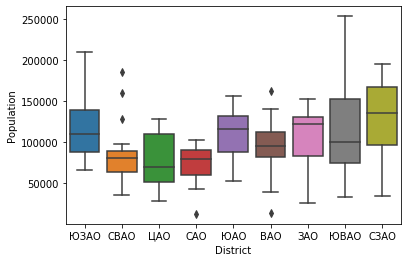

In [8]:
print ("Let's look at the relationship between 'District' and 'Population'")
sns.boxplot(x="District", y="Population", data=Moscow_Borough_Feature_df)

We can see that the distributions of Population between Boroughs in the different Districts have aт overlap, but we can estimate, that the most populated Boroughs are placed in 'ЮЗАО', 'ЮАО', 'СЗАО' and 'ЗАО' Districts.  

Let's look at the relationship between 'District' and 'Housing Price'


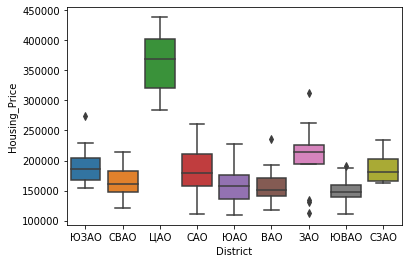

In [9]:
print ("Let's look at the relationship between 'District' and 'Housing Price'")
sns.boxplot(x="District", y="Housing_Price", data=Moscow_Borough_Feature_df)

We see that the distributions of Housing Price between Boroughs in the different Districts are distinct enough.

As the result of boxplots visualization, categorical feature 'District' would be a good potential redictor only of Housing Price.

### Correlation analysis

**Calculate and visualize correlation matrix**

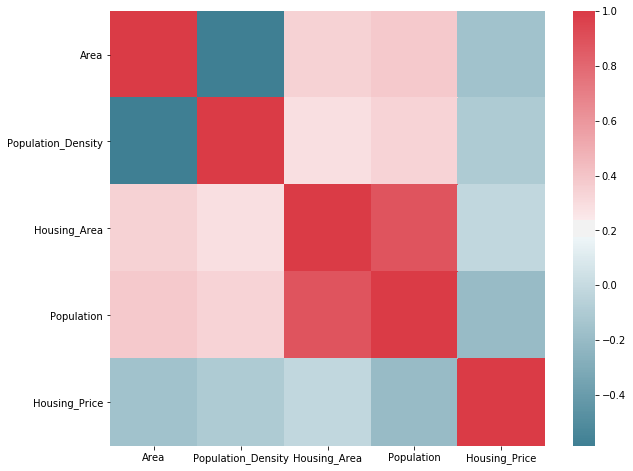

In [10]:
# calculate correlation matrix 
Moscow_Borough_Feature_corr = Moscow_Borough_Feature_df.corr()

# visualize correlation matrix 
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(Moscow_Borough_Feature_corr, mask=np.zeros_like(Moscow_Borough_Feature_corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

In [11]:
print('Take a look at the correlation matrix ')
Moscow_Borough_Feature_corr.head(6)

Take a look at the correlation matrix 


Area  Population_Density  Housing_Area  Population  \
Area                1.000000           -0.585991      0.344188    0.380587   
Population_Density -0.585991            1.000000      0.289456    0.338621   
Housing_Area        0.344188            0.289456      1.000000    0.887856   
Population          0.380587            0.338621      0.887856    1.000000   
Housing_Price      -0.154996           -0.101348     -0.016971   -0.195774   

                    Housing_Price  
Area                    -0.154996  
Population_Density      -0.101348  
Housing_Area            -0.016971  
Population              -0.195774  
Housing_Price            1.000000

Let's estimate the significant of the correlations with P-value. By convention, when the:

- p-value is  <  0.001: we say there is strong evidence that the correlation is significant.
- the p-value is  <  0.05: there is moderate evidence that the correlation is significant.
- the p-value is  <  0.1: there is weak evidence that the correlation is significant.
- the p-value is  >  0.1: there is no evidence that the correlation is significant.

**Let's estimate the significant of the correlations between 'Area', 'Population_Density', 'Housing_Area' and 'Population'**

In [13]:
# Let's estimate the significant of the correlations between 'Area', 'Population_Density', 'Housing_Area' and 'Population'
pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Area'], Moscow_Borough_Feature_df['Population'])
print("The Pearson Correlation Coefficient 'Area' to 'Population' is", pearson_coef, " with a P-value of P =", p_value)  

pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Population_Density'], Moscow_Borough_Feature_df['Population'])
print("The Pearson Correlation Coefficient 'Population_Density' to 'Population' is", pearson_coef, " with a P-value of P =", p_value)  

pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Housing_Area'], Moscow_Borough_Feature_df['Population'])
print("The Pearson Correlation Coefficient 'Housing_Area' to 'Population' is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient 'Area' to 'Population' is 0.3805873263508918  with a P-value of P = 1.8028898720764835e-05
The Pearson Correlation Coefficient 'Population_Density' to 'Population' is 0.33862089326311196  with a P-value of P = 0.00015496849213042396
The Pearson Correlation Coefficient 'Housing_Area' to 'Population' is 0.8878557225818343  with a P-value of P = 1.36388885363977e-41


Correlation between 'Area', 'Population_Density' and 'Population' is statistically significant, although the linear relationship isn't extremely strong.  
Correlation between 'Housing_Are' and 'Population' is statistically highly significant, and the linear relationship is extremely strong. 

**Let's estimate the significant of the correlations between 'Area', 'Population_Density', 'Housing_Area' and 'Housing_Price'**

In [14]:
#Let's estimate the significant of the correlations between 'Area', 'Population_Density', 'Housing_Area' and 'Housing_Price'
pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Area'], Moscow_Borough_Feature_df['Housing_Price'])
print("The Pearson Correlation Coefficient 'Area' to 'Housing_Price' is", pearson_coef, " with a P-value of P =", p_value)  

pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Population_Density'], Moscow_Borough_Feature_df['Housing_Price'])
print("The Pearson Correlation Coefficient 'Population_Density' to 'Housing_Price' is", pearson_coef, " with a P-value of P =", p_value)  

pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Housing_Area'], Moscow_Borough_Feature_df['Housing_Price'])
print("The Pearson Correlation Coefficient 'Housing_Area' to 'Housing_Price' is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient 'Area' to 'Housing_Price' is -0.15499599520906004  with a P-value of P = 0.09095993625676131
The Pearson Correlation Coefficient 'Population_Density' to 'Housing_Price' is -0.101347654460966  with a P-value of P = 0.2707112154681113
The Pearson Correlation Coefficient 'Housing_Area' to 'Housing_Price' is -0.0169708163901411  with a P-value of P = 0.854034357178659


Correlation between 'Area', 'Population_Density', 'Housing_Area' and 'Housing_Price' is not statistically significant, although the linear relationship isn't strong. 

**Let's estimate the significant of the correlations between 'Area', 'Population_Density', 'Housing_Area'**

In [15]:
#Let's estimate the significant of the correlations between 'Area', 'Population_Density', 'Housing_Area'
pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Area'], Moscow_Borough_Feature_df['Population_Density'])
print("The Pearson Correlation Coefficient 'Area' to 'Population_Density' is", pearson_coef, " with a P-value of P =", p_value)  

pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Housing_Area'], Moscow_Borough_Feature_df['Population_Density'])
print("The Pearson Correlation Coefficient 'Housing_Area' to 'Population_Density' is", pearson_coef, " with a P-value of P =", p_value)  

pearson_coef, p_value = stats.pearsonr(Moscow_Borough_Feature_df['Housing_Area'], Moscow_Borough_Feature_df['Area'])
print("The Pearson Correlation Coefficient 'Housing_Area' to 'Area' is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient 'Area' to 'Population_Density' is -0.5859910838643374  with a P-value of P = 2.0503829299220935e-12
The Pearson Correlation Coefficient 'Housing_Area' to 'Population_Density' is 0.2894561614147714  with a P-value of P = 0.0013432392930785705
The Pearson Correlation Coefficient 'Housing_Area' to 'Area' is 0.3441883147278516  with a P-value of P = 0.00011849306555458508


Correlation between 'Area' to 'Population_Density' is statistically hughly significant, and the linear relationship is extremely strong.  
So we can exclude 'Population_Density' from our considerations.

## K-Means Clustering

In my research, I will try to determine the optimal places for the location of fitness centers in Moscow boroughs, taking into account the number of people, the cost of real estate and the density of other fitness facilities.

So try to perform Moscow Boroughs segmentation with K-Means using elbow method to detect Boroughs that have highest mean population and smallest mean housing price.

Define the function clustering using k-means with elbow visualizations

In [16]:
def KMeans_elbow(X, max_clusters=10):
   
    #==============================================================================
    # Building the clustering model and calculating the values of the Distortion and Inertia
    #==============================================================================
    distortions = [] 
    inertias = [] 
    mapping1 = {} 
    mapping2 = {} 
    K = range(1,max_clusters) 
    
     
    for k in K: 
        #Building and fitting the model 
        kmeans = KMeans(init = "k-means++", n_clusters=k, random_state=0, n_init = 12)
        kmeans.fit(X) 
          
        distortions.append(sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 
        inertias.append(kmeans.inertia_) 
      
        mapping1[k] = sum(np.min(cdist(X, kmeans.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0] 
        mapping2[k] = kmeans.inertia_ 
    
    
    #==============================================================================
    # Visualizing the results using the different values of Distortion
    #==============================================================================
    print('Visualizing the results using the different values of Distortion')
    for key,val in mapping1.items(): 
        print(str(key)+' : '+str(val))
    
    plt.plot(K, distortions, 'bx-') 
    plt.xlabel('Values of K') 
    plt.ylabel('Distortion') 
    plt.title('The Elbow Method using Distortion') 
    plt.show() 
    
    #==============================================================================
    # Visualizing the results using the different values of Inertia
    #==============================================================================
    print('Visualizing the results using the different values of Inertia')
    for key,val in mapping2.items(): 
        print(str(key)+' : '+str(val)) 
        
    plt.plot(K, inertias, 'bx-') 
    plt.xlabel('Values of K') 
    plt.ylabel('Inertia') 
    plt.title('The Elbow Method using Inertia') 
    plt.show() 

### Calculate number of clusters using elbow method

Visualizing the results using the different values of Distortion
1 : 1.1679534787476373
2 : 0.9770333890796944
3 : 0.7525815553527937
4 : 0.6626384906157
5 : 0.5719861783813774
6 : 0.5167376260486283
7 : 0.47467465888735644
8 : 0.43603615973868753
9 : 0.40260144059670544


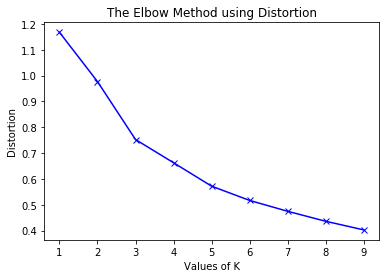

Visualizing the results using the different values of Inertia
1 : 240.0
2 : 154.8554826213927
3 : 87.31369540936936
4 : 68.41935600971378
5 : 51.38354105867041
6 : 42.7197017981842
7 : 34.35161137393824
8 : 29.291755213563313
9 : 25.16829222098773


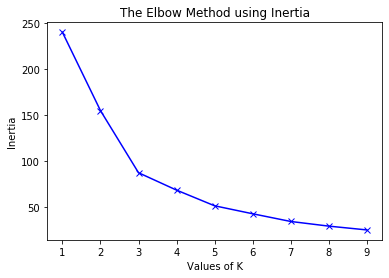

In [17]:
# prepare dataset for K-means clustering
X2 = Moscow_Borough_df[['Borough_Population','Borough_Housing_Price']]

# Normalizing over the standard deviation
X2 = StandardScaler().fit_transform(X2)

# itterate from 1 to 10 n_clusters, calculate distortion and inertia, visualize it
KMeans_elbow(X2, 10)

We can see that there are elbows at 3 centroid. Let's analyze it.

### Analyze K-Means clusters

In [19]:
# Analyze 3 centroid KMeans clustering
kclusters = 3

# run k-means clustering
kmeans = KMeans(init = "k-means++", n_clusters=kclusters, random_state=0, n_init = 12)
kmeans.fit(X2)

# Add clustering labels
Moscow_Borough_df['Cluster_Labels'] = kmeans.labels_.astype(int)

# Analyze Clustres 
groups = Moscow_Borough_df.groupby('Cluster_Labels')
Moscow_population = Moscow_Borough_df['Borough_Population'].sum()
Moscow_area = Moscow_Borough_df['Borough_Area'].sum()
Moscow_Clustering_df = groups.mean().reset_index()[['Cluster_Labels', 'Borough_Population', 'Borough_Housing_Price']]
Moscow_Clustering_df.columns = ['Cluster_Labels', 'Population_Mean', 'Housing_Price_Mean']
Moscow_Clustering_df['Population_Sum'] = groups.sum().reset_index()[['Borough_Population']]
Moscow_Clustering_df['Population_%'] = Moscow_Clustering_df['Population_Sum'] / Moscow_population * 100
Moscow_Clustering_df['Borough_Count'] = groups.count().reset_index()[['Borough_Name']]
Moscow_Clustering_df['Area_Sum'] = groups.sum().reset_index()[['Borough_Area']]
Moscow_Clustering_df['Area_%'] = Moscow_Clustering_df['Area_Sum'] / Moscow_area * 100
Moscow_Clustering_df['Population_Density'] = Moscow_Clustering_df['Population_Sum'] / Moscow_Clustering_df['Area_Sum']

# Print clusters 
Moscow_Clustering_df.head()

# Save dataframe
Moscow_Clustering_df.to_csv("Moscow_Clustering_df.csv", index = False)
Moscow_Borough_df.to_csv("Moscow_Borough_df.csv", index = False)

In [20]:
Moscow_Clustering_df.head()

Cluster_Labels  Population_Mean  Housing_Price_Mean  Population_Sum  \
0               0     79805.666667       333794.866667         1197085   
1               1     78538.901408       173695.070423         5576262   
2               2    153187.235294       160741.323529         5208366   

   Population_%  Borough_Count  Area_Sum     Area_%  Population_Density  
0      9.990934             15    113.65  10.877992        10533.084030  
1     46.539773             71    539.87  51.673574        10328.897698  
2     43.469294             34    391.25  37.448434        13312.117572

As we can see, there are 3 clusters, 
- "0" Cluster - characterized by low mean population (78538 people per Borough), relatively high mean housing price (173695 rubles/m²) and low population density (10328 people/km²)
- "1" Cluster - characterized by highest mean population (153187 people per Borough), smallest mean housing price (160741 rubles/m²) and highest population density (13312 people/km²)
- "2" Cluster - characterized by low mean population (79805 people per Borough), highest mean housing price (333794 rubles/m²) and low population density (10533 people/km²)

Very good result of the KMean clustering.   
"1" Cluster perfectly fits my research criteria. 
- boroughs from this cluster have highest mean population and smallest mean housing price
- in 34 boroughs about 43% of the Moscow population occupied only 37% of the Moscow City area, that mean the highest population density

**Vizualize clusters using boxplots visualization**

Let's look at the relationship between 'Cluster_Labels' and 'Borough_Housing_Price'


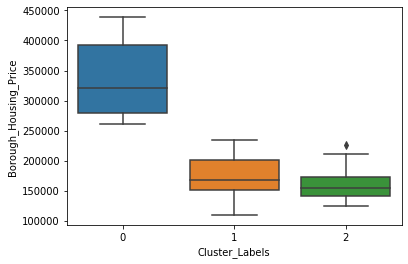

In [22]:
print ("Let's look at the relationship between 'Cluster_Labels' and 'Borough_Housing_Price'")
sns.boxplot(x="Cluster_Labels", y="Borough_Housing_Price", data=Moscow_Borough_df)

Let's look at the relationship between 'Cluster_Labels' and 'Borough_Population'


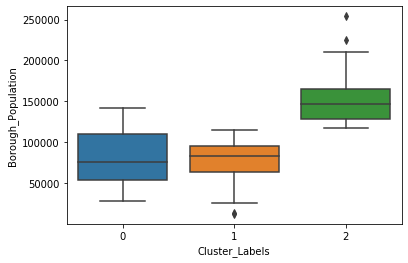

In [23]:
print ("Let's look at the relationship between 'Cluster_Labels' and 'Borough_Population'")
sns.boxplot(x="Cluster_Labels", y="Borough_Population", data=Moscow_Borough_df)

**Vizualize clusters using choropleth map**

In [28]:
Moscow_Borough_df = pd.read_csv("Moscow_Borough_df.csv")
mo_geojson = 'mo.geojson'

# Moscow latitude and longitude values
Moscow_lat= 55.7504461
Moscow_lng= 37.6174943

# create map 
Moscow_map = folium.Map(location=[Moscow_lat, Moscow_lng], zoom_start=10)

# generate choropleth map
folium.Choropleth(
    geo_data=mo_geojson,
    data=Moscow_Borough_df,
    name='Population Density',
    columns=['Borough_Name', 'Cluster_Labels'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Borough Gym Clustering in Moscow City')


# Add Borougs center as markers to Moscow map 
for Borough_Name, lat, lng, Borough_Population in zip(Moscow_Borough_df['Borough_Name'], Moscow_Borough_df['Latitude'], Moscow_Borough_df['Longitude'], Moscow_Borough_df['Borough_Population']):
    folium.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        #popup='{}, Москва, Россия ({:})'.format(Borough_Name, Borough_Population),
        popup=folium.Popup('{}, Москва, Россия ({:})'.format(Borough_Name, Borough_Population), parse_html=True),
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(Moscow_map)

Moscow_map

# Result

The result of my research consisted of:

- List of the optimal Boroughs for the location of fitness centers, according to the main criterias
  - high population of the borough
  - low cost of real estate in the borough
- List of the other competitive fitness facilities in the each Borough from the optimal list
- Interactive choropleth map and heatmap with other competitive fitness facilities in the each Borough

## Dataset of the optimal Boroughs

In [29]:
# List of optimal Boroughs for the location of fitness centers
Moscow_Recomended_Borough_df = Moscow_Borough_df[Moscow_Borough_df['Cluster_Labels'].isin(['1'])]

# Drop some colums 
Moscow_Recomended_Borough_df.drop(['Latitude','Longitude','Cluster_Labels', 'OKTMO_District_Code', 'OKATO_Borough_Code', 'Borough_Housing_Area_Per_Person'], axis=1, inplace=True)

# reset index
Moscow_Recomended_Borough_df.reset_index(drop=True, inplace=True)

# save the result dataset
Moscow_Recomended_Borough_df.to_csv("Moscow_Recomended_Borough_df.csv", index = False)

# Take a look at the dataframe
Moscow_Recomended_Borough_df.head(40)

C:\Users\User\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Borough_Name District_Name         Borough_Type  Borough_Area  \
0          Академический          ЮЗАО  Муниципальный округ          5.83   
1           Алексеевский          СВАО  Муниципальный округ          5.29   
2           Алтуфьевский          СВАО  Муниципальный округ          3.25   
3               Аэропорт           САО  Муниципальный округ          4.58   
4           Бабушкинский          СВАО  Муниципальный округ          5.07   
5        Бескудниковский           САО  Муниципальный округ          3.30   
6      Бирюлёво Западное           ЮАО  Муниципальный округ          8.51   
7            Богородское           ВАО  Муниципальный округ         10.24   
8               Братеево           ЮАО  Муниципальный округ          7.63   
9              Бутырский          СВАО  Муниципальный округ          5.04   
10               Внуково           ЗАО  Муниципальный округ         17.42   
11            Войковский           САО  Муниципальный округ          6.61   
12    Восточное Дегунино           САО  Муниципальный округ          3.77   
13   Восточное Измайлово           ВАО  Муниципальный округ          3.85   
14             Восточный           ВАО  Муниципальный округ          3.14   
15           Головинский           САО  Муниципальный округ          8.93   
16           Даниловский           ЮАО  Муниципальный округ         12.60   
17           Дмитровский           САО  Муниципальный округ          7.29   
18               Донской           ЮАО  Муниципальный округ          5.73   
19     Западное Дегунино           САО  Муниципальный округ          7.53   
20             Измайлово           ВАО  Муниципальный округ         15.24   
21               Капотня          ЮВАО  Муниципальный округ          8.06   
22               Коптево           САО  Муниципальный округ          5.38   
23      Косино-Ухтомский           ВАО  Муниципальный округ         15.05   
24              Котловка          ЮЗАО  Муниципальный округ          3.94   
25            Крылатское           ЗАО  Муниципальный округ         12.04   
26               Куркино          СЗАО  Муниципальный округ          7.90   
27          Левобережный           САО  Муниципальный округ          8.00   
28             Лефортово          ЮВАО  Муниципальный округ          9.06   
29             Лианозово          СВАО  Муниципальный округ          5.79   
30         Ломоносовский          ЮЗАО  Муниципальный округ          3.34   
31      Лосиноостровский          СВАО  Муниципальный округ          5.54   
32               Марфино          СВАО  Муниципальный округ          2.97   
33          Марьина Роща          СВАО  Муниципальный округ          4.68   
34          Метрогородок           ВАО  Муниципальный округ         27.57   
35        Молжаниновский           САО  Муниципальный округ         21.78   
36  Москворечье-Сабурово           ЮАО  Муниципальный округ          9.30   
37    Нагатино-Садовники           ЮАО  Муниципальный округ          8.17   
38              Нагорный           ЮАО  Муниципальный округ          5.42   
39            Некрасовка          ЮВАО  Муниципальный округ          5.58   

    Borough_Population  Borough_Population_Density  Borough_Housing_Area  \
0               109387                       18762                2467.0   
1                80534                       15223                1607.9   
2                57596                       17721                 839.3   
3                79486                       17355                1939.7   
4                88537                       17462                1586.3   
5                79603                       24122                1391.7   
6                88672                       10419                1183.2   
7               109324                       10676                1744.1   
8               110021                       14419                1585.4   
9                71458                       14178                1236.2   
10               2

## Dataset of the competitive fitness facilities

In [30]:
# load previously saved dataset
Moscow_venues_df = pd.read_csv("Moscow_venues_df.csv")

# list of the recomended  Boughs from cluster 1
Moscow_Recomended_Borough_list = Moscow_Borough_df[Moscow_Borough_df['Cluster_Labels'].isin(['1'])]['Borough_Name']

# list of all subcategories Gym / Fitness Center
gym_categories = ['Gym / Fitness Center','Boxing Gym','Climbing Gym','Cycle Studio','Gymnastics Gym','Gym','Martial Arts Dojo','Outdoor Gym','Pilates Studio','Weight Loss Center','Yoga Studio']

# Make venues subset of all subcategories of "Gym / Fitness Center"
Moscow_gym_venues_df = Moscow_venues_df[Moscow_venues_df['Venue_Category_Name'].isin(gym_categories)]
print('There are {} venues of "Gym / Fitness Center" subcategories of all {} venues in Moscow City'.format(Moscow_gym_venues_df.shape[0], Moscow_venues_df.shape[0]))

# Delete Venues that placed outside our cluster 1
Moscow_gym_venues_df = Moscow_gym_venues_df[Moscow_gym_venues_df['Borough_Name'].isin(Moscow_Recomended_Borough_list)]
print('There are {} venues of all "Gym / Fitness Center" subcategories in 1 Cluster'.format(Moscow_gym_venues_df.shape[0]))

There are 928 venues of "Gym / Fitness Center" subcategories of all 20864 venues in Moscow City
There are 419 venues of all "Gym / Fitness Center" subcategories in 1 Cluster


In [31]:
# prepare the result dataset with fitness center 
Moscow_gym_venues_df = Moscow_gym_venues_df[['Borough_Name','Venue_Name','Venue_Category_Name','Venue_Location','Venue_Latitude','Venue_Longitude']]

# reset index
Moscow_gym_venues_df.reset_index(drop=True, inplace=True)

# save the result dataset
Moscow_gym_venues_df.to_csv("Moscow_gym_venues_df.csv", index = False)

# Take a look at the dataframe
Moscow_gym_venues_df.head(30)

Borough_Name                         Venue_Name  \
0        Северное Бутово                        Ddx Fitness   
1        Северное Бутово                        Спорт Нация   
2        Северное Бутово                        Фитнес Холл   
3        Северное Бутово           White Boys Rugby Stadium   
4        Северное Бутово  Спортивный комплекс «Синяя птица»   
5      Бирюлёво Западное                                Gym   
6      Бирюлёво Западное               Фитнесс-клуб "Идеал"   
7     Чертаново Северное            Тренажерка (Час Спорта)   
8     Чертаново Северное            Fitness Club Plastiline   
9            Обручевский                        Power Style   
10    Чертаново Северное                             Спринт   
11    Чертаново Северное                      Air Fitness ❤   
12    Чертаново Северное                   World Class LITE   
13           Обручевский                           Спортзал   
14    Чертаново Северное                       Nice Fitness   
15    Чертаново Северное                 спортклуб "Персей"   
16    Чертаново Северное                           Панджшер   
17    Чертаново Северное              Bikram Yoga Varshavka   
18    Чертаново Северное   Московский центр боевых искусств   
19           Обручевский                        World Class   
20           Обручевский            Спортивный клуб "Ермак"   
21    Чертаново Северное        Фитнес-клуб Академия Спорта   
22           Обручевский                      Wellness Park   
23           Обручевский                              Зебра   
24             Черёмушки                        Газпром ФОК   
25             Черёмушки    Газпром - Оздоровительный Центр   
26              Нагорный                          ДА!ФИТНЕС   
27  Проспект Вернадского                 Gym Fitness Studio   
28  Проспект Вернадского                         Gymnastika   
29  Проспект Вернадского                             Амрита   

     Venue_Category_Name                                     Venue_Location  \
0   Gym / Fitness Center                                             117216   
1                    Gym         ТЦ «Апельсин» (Куликовская ул., 9), 117216   
2   Gym / Fitness Center                   Знаменские Садки ул., 7а, стр. 1   
3      Martial Arts Dojo                                             Россия   
4                    Gym                               Старокачаловская ул.   
5                    Gym                                             Россия   
6                    Gym                                 Булатниковская ул.   
7                    Gym                                             Россия   
8   Gym / Fitness Center             7 Континент (ул. Днепропетровская, 4А)   
9                    Gym                            Ул. Островитянова, д. 6   
10  Gym / Fitness Center               Варшавское ш., 125ж, корп. 5, 117587   
11  Gym / Fitness Center                                             Россия   
12  Gym / Fitness Center                  Варшавское шоссе, д.122 А, 117587   
13                   Gym                                    БЦ «Парк плейс»   
14  Gym / Fitness Center      мкрн. Северное Чертаново, 1а, корп. 1, 111111   
15  Gym / Fitness Center        Сумской проезд, 6А (Сумской проезд), 117208   
16  Gym / Fitness Center                            Сумской пр., 8, корп. 3   
17           Yoga Studio  Варшавское ш., 118, корп. 1 (БЦ Варшавка-SKY),...   
18     Martial Arts Dojo                Варшавское ш., 118, корп. 1, 117587   
19  Gym / Fitness Center                  Ленинский проспект, д.109, 119421   
20                   Gym   ул. Обручева, 23, к. 3 (ул. Архитектора Власова)   
21  Gym / Fitness Center             ТЦ Аэробус (Варшавское ш., 95, корп.1)   
22  Gym / Fitness Center                      Воронцовские пруды, 3, 117530   
23  Gym / Fitness Center                                    Профсоюзная, 76   
24                   Gym                                       Наметкина 16   
25  

## Choropleth map and heatmap of competitive fitness facilities

In [32]:
Moscow_Borough_df = pd.read_csv("Moscow_Borough_df.csv")
mo_geojson = 'mo.geojson'

# Moscow latitude and longitude values
Moscow_lat= 55.7504461
Moscow_lng= 37.6174943

# create map
Moscow_map = folium.Map(location=[Moscow_lat, Moscow_lng], zoom_start=10)


# generate choropleth map
folium.Choropleth(
    geo_data=mo_geojson,
    data=Moscow_Borough_df,
    name='Population Density',
    columns=['Borough_Name', 'Cluster_Labels'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd', 
    fill_opacity=0.4, 
    line_opacity=0.2,
    legend_name='Borough Gym Clustering in Moscow City')

# List comprehension to make out list of lists
heat_data = [[row['Venue_Latitude'], row['Venue_Longitude']] for index, row in Moscow_gym_venues_df.iterrows()]

# Add HeatMap
HeatMap(heat_data).add_to(Moscow_map)
#folium.GeoJson(mo_geojson).add_to(Moscow_map)

# Add Borougs center as markers to Moscow map 
for Venue_name, lat, lng in zip(Moscow_gym_venues_df['Venue_Name'], Moscow_gym_venues_df['Venue_Latitude'], Moscow_gym_venues_df['Venue_Longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=1, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=folium.Popup('{}'.format(Venue_name), parse_html=True),
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(Moscow_map)

# display map
Moscow_map

In [33]:
Moscow_map.save('map\Moscow_gym_heatmap.html')

In [34]:
mo_geojson = 'mo.geojson'

# Moscow latitude and longitude values
Moscow_lat= 55.7504461
Moscow_lng= 37.6174943

# create map 
Moscow_map = folium.Map(location=[Moscow_lat, Moscow_lng], zoom_start=10)

# generate choropleth map
folium.Choropleth(
    geo_data=mo_geojson,
    data=Moscow_Borough_df,
    name='Population Density',
    columns=['Borough_Name', 'Cluster_Labels'],
    key_on='feature.properties.NAME',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Borough Gym Clustering in Moscow City')


# Add Borougs center as markers to Moscow map 
for Venue_name, lat, lng in zip(Moscow_gym_venues_df['Venue_Name'], Moscow_gym_venues_df['Venue_Latitude'], Moscow_gym_venues_df['Venue_Longitude']):
    folium.CircleMarker(
        [lat, lng],
        radius=5, # define how big you want the circle markers to be
        color='yellow',
        fill=True,
        popup=folium.Popup('{}'.format(Venue_name), parse_html=True),
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(Moscow_map)

    folium.Circle([lat, lng], radius=250, color='blue', fill=False).add_to(Moscow_map)

Moscow_map

In [35]:
Moscow_map.save('map\Moscow_gym_250.html')